* https://arxiv.org/pdf/1410.6551.pdf
* https://arxiv.org/pdf/1109.4561.pdf

In [22]:
Nx=8; Ny=10; N=Nx*Ny
p=1; q=Ny
cut_off=Nx
PN=[0,1,2,3]
U=2
imp_site_1 = 44
imp_site_2 = 68
mobile_imp_sites = [69,70,71,63,55,47,39,31,23,22,21,20,19,18,17,25,23,41,49,57,65,66,67,68]
V_1 = 4
V_2 = 4
pn = 3
N_d = 1
D = (factorial(N_d + pn - 1) / (factorial(N_d) * factorial(pn - 1))) * ((Nx - N_d) / pn);
D = 2; # two quasihole

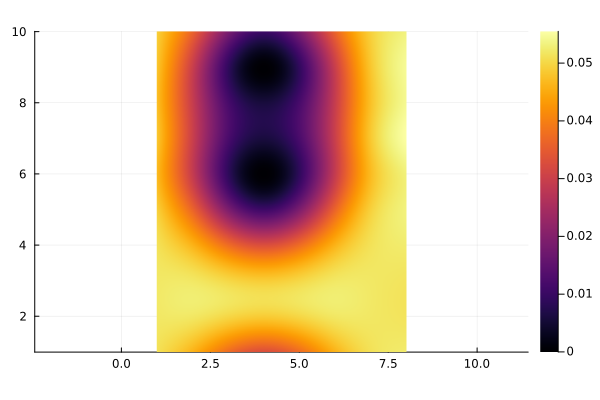

In [23]:
using NBInclude
@nbinclude("Hofstadter First Band Approximation.ipynb"; regex=r"#.*executeme")

In [24]:
reverse(square_lattice(Nx,Ny)[1], dims=1)

10×8 OffsetArray(::Matrix{Int64}, 0:9, 0:7) with eltype Int64 with indices 0:9×0:7:
 73  74  75  76  77  78  79  80
 65  66  67  68  69  70  71  72
 57  58  59  60  61  62  63  64
 49  50  51  52  53  54  55  56
 41  42  43  44  45  46  47  48
 33  34  35  36  37  38  39  40
 25  26  27  28  29  30  31  32
 17  18  19  20  21  22  23  24
  9  10  11  12  13  14  15  16
  1   2   3   4   5   6   7   8

In [43]:
path_states = []
for imp_site_2 in mobile_imp_sites
    H = get_total_H(V_1, V_2, imp_site_1, imp_site_2, num_mb_list_op, H_Kin, H_Int)
    E, UU = eigen(dense((H+H')/2).data)
    push!(path_states, UU)
end
# Gaining phase factor through the path
path_states[1] == path_states[length(mobile_imp_sites)]

false

In [44]:
psi_0 = path_states[1]
psi_2pi = path_states[length(mobile_imp_sites)]
B = zeros(Complex{Float64}, size(H)[1], size(H)[2])
for i in 1:size(H)[1]
    for j in 1:size(H)[2]
        B_ij = psi_2pi[:,j]'*psi_0[:,i]
        B[i,j] = B_ij
    end
end
B_E, B_U = eigen(B)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
165-element Vector{ComplexF64}:
 -0.9998988915483269 + 0.014219939536697802im
 -0.9998564432316362 - 0.01694381681311317im
 -0.9996416419933147 + 0.026769153757799334im
 -0.9992930991605464 + 0.03759390868371246im
 -0.9962018384910186 - 0.08707408906835117im
 -0.9930915472466821 + 0.11734214412220785im
 -0.9926511086094018 - 0.12101147291281818im
 -0.9890870103292095 + 0.1473325693729363im
  -0.983107194451102 - 0.18303071933009463im
 -0.9783755858733468 + 0.20683619839619044im
 -0.9776428873111878 + 0.2102721686049774im
 -0.9769735435963287 - 0.21336048160995255im
 -0.9669062869189581 - 0.2551317940136167im
                     ⋮
  0.9814126651002322 - 0.1919093035286761im
  0.9856273728566584 - 0.16893395714204337im
  0.9862308711420685 + 0.16537432934512164im
  0.9909587842083434 + 0.13416664265127926im
  0.9918495310755842 - 0.12741470756996873im
  0.9961969380052079 + 0.08713013662924528im
  0.9970589363